# Visualization Tools
RoboDet: Robust Bird's Eye View Detection under Corruptions

In [105]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Results

Pre-define `marker` and `color` for each model.

In [106]:
MARKER = dict(
    BEVFormer_Small = 'o', 
    BEVFormer_Small_SingleFrame = 'o',
    BEVFormer_Base = 'o', 
    BEVFormer_Base_SingleFrame = 'o',
    DETR3D_cbgs = 'o', 
    DETR3D = 'o', 
    PETR_r50 = 'o',
    PETR_Vov = 'o',
    BEVDepth_r50 = 'o', 
    BEVDet_r50 = 'o',
    BEVerse_Tiny = 'o',
    BEVerse_Small = 'o',
    ORA3D = 'o',
    PolarFormer_r101 = 'o',
    PolarFormer_Vov = 'o',
    SRCN3D_res = 'o',
    SRCN3D_Vov = 'o',
    Sparse4D = 'o',
)

In [107]:
# COLORS = dict(
#     BEVFormer_Small = '#4169E1', 
#     BEVFormer_Base = '#0000FF', 
#     DETR3D_cbgs = '#9932CC', 
#     DETR3D = '#800080', 
#     PETR_r50 = '#F08080',
#     PETR_Vov = '#B22222',
#     PolarFormer_r101 = '#A9A9A9', 
#     PolarFormer_Vov = '#696969', 
#     BEVDepth_r50 = '#D2691E', 
#     BEVDet_r50 = '#8B4513',
#     BEVerse_Tiny = '#32CD32' ,
#     BEVerse_Small = '#006400' ,
#     ORA3D = '#DAA520' ,
#     SRCN3D_res = '#C0C000' ,
#     SRCN3D_Vov = '#808000' ,
#     Sparse4D = '#FFA500' ,
#     )

COLORS = dict(
    BEVFormer_Small = '#4682B4', 
    BEVFormer_Small_SingleFrame = '#4682B4', 
    BEVFormer_Base = '#4682B4', 
    BEVFormer_Base_SingleFrame = '#4682B4', 
    DETR3D_cbgs = '#4682B4', 
    DETR3D = '#4682B4', 
    PETR_r50 = '#4682B4',
    PETR_Vov = '#4682B4',
    PolarFormer_r101 = '#4682B4', 
    PolarFormer_Vov = '#4682B4', 
    BEVDepth_r50 = '#4682B4', 
    BEVDet_r50 = '#4682B4',
    BEVerse_Tiny = '#4682B4' ,
    BEVerse_Small = '#4682B4' ,
    ORA3D = '#4682B4' ,
    SRCN3D_res = '#4682B4' ,
    SRCN3D_Vov = '#4682B4' ,
    Sparse4D = '#4682B4' ,
    )

Model results

In [166]:
DETR3D = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4224, 0.3468, 0.7647, 0.2678, 0.3917, 0.8754, 0.2108], 
    'cam_crash':   [0.2859, 0.1144, 0.8400, 0.2821, 0.4707, 0.8992, 0.2202],
    'frame_lost':  [0.2604, 0.0898, 0.8647, 0.3030, 0.5041, 0.9297, 0.2439],
    'color_quant': [0.3177, 0.2165, 0.8953, 0.2816, 0.5266, 0.9813, 0.2483],
    'motion_blur': [0.2661, 0.1479, 0.9146, 0.3085, 0.6351, 1.0385, 0.2526],
    'brightness':  [0.4002, 0.3149, 0.7915, 0.2703, 0.4348, 0.8733, 0.2028],
    'low_light':   [0.2786,	0.1559,	0.8768,	0.2947,	0.5802,	1.0290,	0.2654],
    'fog':         [0.3912, 0.3007, 0.7961, 0.2711, 0.4326, 0.8807, 0.2110],
    'snow':        [0.1913, 0.0776, 0.9714, 0.3752, 0.7486, 1.2478, 0.3797],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

DETR3D_cbgs = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4341,	0.3494,	0.7163,	0.2682,	0.3798,	0.8421,	0.1997], 
    'cam_crash':   [0.2991,	0.1174,	0.7932,	0.2853,	0.4575,	0.8471,	0.2131],
    'frame_lost':  [0.2685,	0.0923,	0.8268,	0.3135,	0.5042,	0.8867,	0.2455],
    'color_quant': [0.3235,	0.2152,	0.8571,	0.2875,	0.5350,	0.9354,	0.2400],
    'motion_blur': [0.2542,	0.1385,	0.8909,	0.3355,	0.6707,	1.0682,	0.2928],
    'brightness':  [0.4154,	0.3200,	0.7357,	0.2720,	0.4086,	0.8302,	0.1990],
    'low_light':   [0.2766, 0.1539, 0.8419, 0.3262, 0.5682, 1.0952, 0.2847],
    'fog':         [0.4020,	0.3012,	0.7552,	0.2710,	0.4237,	0.8302,	0.2054],
    'snow':        [0.1925,	0.0702,	0.9246,	0.3793,	0.7648,	1.2585,	0.3577],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': True
}

BEVFormer_Base = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.5174,	0.4164,	0.6726,	0.2734,	0.3704,	0.3941,	0.1974], 
    'cam_crash':   [0.3154,	0.1545,	0.8015,	0.2975,	0.5031,	0.7865,	0.2301],
    'frame_lost':  [0.3017,	0.1307,	0.8359,	0.3053,	0.5262,	0.7364,	0.2328],
    'color_quant': [0.3509,	0.2393,	0.8294,	0.2953,	0.5200,	0.8079,	0.2350],
    'motion_blur': [0.2695,	0.1531,	0.8739,	0.3236,	0.6941,	0.9334,	0.2592],
    'brightness':  [0.4184,	0.3312,	0.7457,	0.2832,	0.4721,	0.7686,	0.2024],
    'low_light':   [0.2515,	0.1394,	0.8568,	0.3601,	0.6571,	1.0322,	0.3453],
    'fog':         [0.4069,	0.3141,	0.7627,	0.2837,	0.4711,	0.7798,	0.2046],
    'snow':        [0.1857,	0.0739,	0.9405,	0.3966,	0.7806,	1.0880,	0.3951],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': False
}

BEVFormer_Base_SingleFrame = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4129,	0.3461,	0.7549,	0.2832,	0.4520,	0.8917,	0.2194], 
    'cam_crash':   [0.2879,	0.1240,	0.8041,	0.2966,	0.5094,	0.8986,	0.2323],
    'frame_lost':  [0.2642,	0.0969,	0.8352,	0.3093,	0.5748,	0.8861,	0.2374],
    'color_quant': [0.3207,	0.2243,	0.8488,	0.2992,	0.5422,	1.0003,	0.2522],
    'motion_blur': [0.2518,	0.1434,	0.8845,	0.3248,	0.7179,	1.1211,	0.2860],
    'brightness':  [0.3819,	0.3093,	0.7761,	0.2861,	0.4999,	0.9466,	0.2201],
    'low_light':   [0.2381,	0.1316,	0.8640,	0.3602,	0.6903,	1.2132,	0.3622],
    'fog':         [0.3662,	0.2907,	0.7938,	0.2870,	0.5162,	0.9702,	0.2254],
    'snow':        [0.1793,	0.0687,	0.9472,	0.3954,	0.8004,	1.2524,	0.4078],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

BEVFormer_Small = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4787, 0.3700, 0.7212, 0.2792, 0.4065, 0.4364, 0.2201], 
    'cam_crash':   [0.2771, 0.1130, 0.8627, 0.3099, 0.5398, 0.8376, 0.2446],
    'frame_lost':  [0.2459, 0.0933, 0.8959, 0.3411, 0.5742, 0.9154, 0.2804],
    'color_quant': [0.3275, 0.2109, 0.8476, 0.2943, 0.5234, 0.8539, 0.2601],
    'motion_blur': [0.2570, 0.1344, 0.8995, 0.3264, 0.6774, 0.9625, 0.2605],
    'brightness':  [0.3741, 0.2697, 0.8064, 0.2830, 0.4796, 0.8162, 0.2226],
    'low_light':   [0.2413,	0.1191,	0.8838,	0.3598,	0.6470,	1.0391,	0.3323],
    'fog':         [0.3583, 0.2486, 0.8131, 0.2862, 0.5056, 0.8301, 0.2251],
    'snow':        [0.1809, 0.0635, 0.9630, 0.3855, 0.7741, 1.1002, 0.3863],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': False
}

BEVFormer_Small_SingleFrame = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.2622,	0.1324,	0.9352,	0.3024,	0.5556,	1.1106,	0.2466], 
    'cam_crash':   [0.2013,	0.0425,	0.9844,	0.3306,	0.6330,	1.0969,	0.2556],
    'frame_lost':  [0.1638,	0.0292,	1.0051,	0.4294,	0.6963,	1.1418,	0.3954],
    'color_quant': [0.2313,	0.1041,	0.9625,	0.3131,	0.6435,	1.1686,	0.2882],
    'motion_blur': [0.1916,	0.0676,	0.9741,	0.3644,	0.7525,	1.3062,	0.3307],
    'brightness':  [0.2520,	0.1250,	0.9484,	0.3034,	0.6046,	1.1318,	0.2486],
    'low_light':   [0.1868,	0.0624,	0.9414,	0.3984,	0.7185,	1.3064,	0.3859],
    'fog':         [0.2442,	0.1181,	0.9498,	0.3055,	0.6343,	1.1806,	0.2592],
    'snow':        [0.1414,	0.0294,	1.0231,	0.4242,	0.8644,	1.3622,	0.4444],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

PETR_r50 = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.3665,	0.3174,	0.8397,	0.2796,	0.6158,	0.9543,	0.2326], 
    'cam_crash':   [0.2320,	0.1065,	0.9383,	0.2975,	0.7220,	1.0169,	0.2585],
    'frame_lost':  [0.2166,	0.0868,	0.9513,	0.3041,	0.7597,	1.0081,	0.2629],
    'color_quant': [0.2472,	0.1734,	0.9121,	0.3616,	0.7807,	1.1634,	0.3473],
    'motion_blur': [0.2299,	0.1378,	0.9587,	0.3164,	0.8461,	1.1190,	0.2847],
    'brightness':  [0.2841,	0.2101,	0.9049,	0.3080,	0.7429,	1.0838,	0.2552],
    'low_light':   [0.1571,	0.0685,	0.9465,	0.4222,	0.9201,	1.4371,	0.4971],
    'fog':         [0.2876,	0.2161,	0.9078,	0.2928,	0.7492,	1.1781,	0.2549],
    'snow':        [0.1417,	0.0582,	1.0437,	0.4411,	1.0177,	1.3481,	0.4713],
    'Pretrain': 'Random',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

PETR_Vov = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4550,	0.4035,	0.7362,	0.2710,	0.4316,	0.8249,	0.2039], 
    'cam_crash':   [0.2924,	0.1408,	0.8167,	0.2854,	0.5492,	0.9014,	0.2267],
    'frame_lost':  [0.2792,	0.1153,	0.8311,	0.2909,	0.5662,	0.8816,	0.2144],
    'color_quant': [0.2968,	0.2089,	0.8818,	0.3455,	0.5997,	1.0875,	0.3123],
    'motion_blur': [0.2490,	0.1395,	0.9521,	0.3153,	0.7424,	1.0353,	0.2639],
    'brightness':  [0.3858,	0.3199,	0.7982,	0.2779,	0.5256,	0.9342,	0.2112],
    'low_light':   [0.2305,	0.1221,	0.8897,	0.3645,	0.6960,	1.2311,	0.3553],
    'fog':         [0.3703,	0.2815,	0.8337,	0.2778,	0.4982,	0.8833,	0.2111],
    'snow':        [0.2632,	0.1653,	0.8980,	0.3138,	0.7034,	1.1314,	0.2886],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'VoVNet',
    'Extra Data':True,
    'Temporal': False,
    'CBGS': False
}

BEVDet_r50 = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.3770,	0.2987,	0.7336,	0.2744,	0.5713,	0.9051,	0.2394], 
    'cam_crash':   [0.2486,	0.0990,	0.8147,	0.2975,	0.6402,	0.9990,	0.2842],
    'frame_lost':  [0.1924,	0.0781,	0.8545,	0.4413,	0.7179,	1.0247,	0.4780],
    'color_quant': [0.2408,	0.1542,	0.8718,	0.3579,	0.7376,	1.2194,	0.3958],
    'motion_blur': [0.2061,	0.1156,	0.8891,	0.4020,	0.7693,	1.1521,	0.4645],
    'brightness':  [0.2565,	0.1787,	0.8380,	0.3736,	0.7216,	1.2912,	0.3955],
    'low_light':   [0.1102,	0.0470,	0.9867,	0.5308,	0.9443,	1.2841,	0.6708],
    'fog':         [0.2461,	0.1404,	0.8801,	0.3018,	0.7483,	1.1610,	0.3112],
    'snow':        [0.0625,	0.0254,	0.9853,	0.7204,	1.0029,	1.1642,	0.8160],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': True
}

BEVDepth_r50 = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4058,	0.3328,	0.6633,	0.2714,	0.5581,	0.8763,	0.2369], 
    'cam_crash':   [0.2638,	0.1111,	0.7407,	0.2959,	0.6373,	1.0079,	0.2749],
    'frame_lost':  [0.2141,	0.0876,	0.7890,	0.4134,	0.6728,	1.0536,	0.4498],
    'color_quant': [0.2751,	0.1865,	0.8190,	0.3292,	0.6946,	1.2008,	0.3552],
    'motion_blur': [0.2513,	0.1508,	0.8320,	0.3516,	0.7135,	1.1084,	0.3765],
    'brightness':  [0.2879,	0.2090,	0.7520,	0.3646,	0.6724,	1.2089,	0.3766],
    'low_light':   [0.1757,	0.0820,	0.8540,	0.4509,	0.8073,	1.3149,	0.5410],
    'fog':         [0.2903,	0.1973,	0.7900,	0.3021,	0.6973,	1.0640,	0.2940],
    'snow':        [0.0863,	0.0350,	0.9529,	0.6682,	0.9107,	1.2750,	0.7802],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': True
}

BEVerse_Tiny = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4665,	0.3214,	0.6807,	0.2782,	0.4657,	0.3281,	0.1893], 
    'cam_crash':   [0.3181,	0.1218,	0.7447,	0.3545,	0.5479,	0.4974,	0.2833],
    'frame_lost':  [0.3037,	0.1466,	0.7892,	0.3511,	0.6217,	0.6491,	0.2844],
    'color_quant': [0.2600,	0.1497,	0.8577,	0.4758,	0.6711,	0.6931,	0.4676],
    'motion_blur': [0.2647,	0.1456,	0.8139,	0.4269,	0.6275,	0.8103,	0.4225],
    'brightness':  [0.2656,	0.1512,	0.8120,	0.4548,	0.6799,	0.7029,	0.4507],
    'low_light':   [0.0593,	0.0235,	0.9744,	0.7926,	0.9961,	0.9437,	0.8304],
    'fog':         [0.2781,	0.1348,	0.8467,	0.3967,	0.6135,	0.6596,	0.3764],
    'snow':        [0.0644,	0.0251,	0.9662,	0.7966,	0.8893,	0.9829,	0.8464],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'SwinTransformer',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': True
}

BEVerse_Tiny_SingleFrame = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.1603,	0.0826,	0.8298,	0.5296,	0.8771,	1.2639,	0.5739], 
    'cam_crash':   [0.0639,	0.0165,	0.9135,	0.7574,	0.9522,	1.1890,	0.8201],
    'frame_lost':  [0.0508,	0.0141,	0.9455,	0.8181,	0.9221,	1.1765,	0.8765],
    'color_quant': [0.0642,	0.0317,	0.9478,	0.7735,	0.9723,	1.2508,	0.8397],
    'motion_blur': [0.0540,	0.0230,	0.9556,	0.8028,	0.9339,	1.2137,	0.8826],
    'brightness':  [0.0683,	0.0360,	0.9369,	0.7315,	0.9878,	1.3048,	0.8531],
    'low_light':   [0.0100,	0.0005,	1.0097,	0.9474,	1.0048,	1.1073,	0.9561],
    'fog':         [0.0402,	0.0179,	0.9789,	0.8230,	1.0094,	1.3083,	0.8962],
    'snow':        [0.0107,	0.0017,	1.0021,	0.9468,	0.9968,	1.1652,	0.9612],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'SwinTransformer',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': True
}

BEVerse_Small = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4951,	0.3512,	0.6243,	0.2694,	0.3999,	0.3292,	0.1827], 
    'cam_crash':   [0.3364,	0.1156,	0.6753,	0.3331,	0.4460,	0.4823,	0.2772],
    'frame_lost':  [0.2485,	0.0959,	0.7413,	0.4389,	0.5898,	0.8170,	0.4445],
    'color_quant': [0.2807,	0.1630,	0.8148,	0.4651,	0.6311,	0.6511,	0.4455],
    'motion_blur': [0.2632,	0.1455,	0.7866,	0.4399,	0.5753,	0.8424,	0.4586],
    'brightness':  [0.3394,	0.1935,	0.7441,	0.3736,	0.4873,	0.6357,	0.3326],
    'low_light':   [0.1118,	0.0373,	0.9230,	0.6900,	0.8727,	0.8600,	0.7223],
    'fog':         [0.2849,	0.1291,	0.7858,	0.4234,	0.5105,	0.6852,	0.3921],
    'snow':        [0.0985,	0.0357,	0.9309,	0.7389,	0.8864,	0.8695,	0.7676],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'SwinTransformer',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': True
}

BEVerse_Small_SingleFrame = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.2682,	0.1513,	0.6631,	0.4228,	0.5406,	1.3996,	0.4483], 
    'cam_crash':   [0.1305,	0.0340,	0.8028,	0.6164,	0.7475,	1.2273,	0.6978],
    'frame_lost':  [0.0822,	0.0274,	0.8755,	0.7651,	0.8674,	1.1223,	0.8107],
    'color_quant': [0.1002,	0.0495,	0.8923,	0.7228,	0.8517,	1.1570,	0.7850],
    'motion_blur': [0.0716,	0.0370,	0.9117,	0.7927,	0.8818,	1.1616,	0.8833],
    'brightness':  [0.1336,	0.0724,	0.8340,	0.6499,	0.8086,	1.2874,	0.7333],
    'low_light':   [0.0132,	0.0041,	0.9862,	0.9356,	1.0175,	0.9964,	0.9707],
    'fog':         [0.0910,	0.0406,	0.8894,	0.7200,	0.8700,	1.0564,	0.8140],
    'snow':        [0.0116,	0.0066,	0.9785,	0.9385,	1.0000,	1.0000,	1.0000],
    'Pretrain': 'Random',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-based',
    'Backbone': 'SwinTransformer',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': True
}

ORA3D = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4436,	0.3677,	0.7319,	0.2698,	0.3890,	0.8150,	0.1975], 
    'cam_crash':   [0.3055,	0.1275,	0.7952,	0.2803,	0.4549,	0.8376,	0.2145],
    'frame_lost':  [0.2750,	0.0997,	0.8362,	0.3075,	0.4963,	0.8747, 0.2340],
    'color_quant': [0.3360,	0.2382,	0.8479,	0.2848,	0.5249,	0.9516,	0.2432],
    'motion_blur': [0.2647,	0.1527,	0.8656,	0.3497,	0.6251,	1.0433,	0.3160],
    'brightness':  [0.4075,	0.3252,	0.7740,	0.2741,	0.4620,	0.8372,	0.2029],
    'low_light':   [0.2613,	0.1509,	0.8489,	0.3445,	0.6207,	1.2113,	0.3278],
    'fog':         [0.3959,	0.3084,	0.7822,	0.2753,	0.4515,	0.8685,	0.2048],
    'snow':        [0.1898,	0.0757,	0.9404,	0.3857,	0.7665,	1.2890,	0.3879],
    'Pretrain': 'DETR3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

PolarFormer_r101 = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4602,	0.3916,	0.7060,	0.2718,	0.3610,	0.8079,	0.2093], 
    'cam_crash':   [0.3133,	0.1425,	0.7746,	0.2840,	0.4440,	0.8524,	0.2250],
    'frame_lost':  [0.2808,	0.1134,	0.8034,	0.3093,	0.4981,	0.8988,	0.2498],
    'color_quant': [0.3509,	0.2538, 0.8059,	0.2999,	0.4812,	0.9724,	0.2592],
    'motion_blur': [0.3221,	0.2117,	0.8196,	0.2946,	0.5727,	0.9379,	0.2258],
    'brightness':  [0.4304,	0.3574,	0.7390,	0.2738,	0.4149,	0.8522,	0.2032],
    'low_light':   [0.2554,	0.1393,	0.8418,	0.3557,	0.6087,	1.2004,	0.3364],
    'fog':         [0.4262,	0.3518,	0.7338,	0.2735,	0.4143,	0.8672,	0.2082],
    'snow':        [0.2304,	0.1058,	0.9125,	0.3363,	0.6592,	1.2284,	0.3174],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': False
}

PolarFormer_Vov = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.5616,	0.5004,	0.5826,	0.2621,	0.2473,	0.6015,	0.1926], 
    'cam_crash':   [0.3904,	0.1900,	0.6509,	0.2740,	0.3012,	0.6204,	0.1996],
    'frame_lost':  [0.3593,	0.1515,	0.6861,	0.2811,	0.3437,	0.6551,	0.1982],
    'color_quant': [0.4328,	0.3386,	0.7216,	0.2732,	0.3562,	0.7960,	0.2308],
    'motion_blur': [0.3448,	0.2196,	0.7956,	0.2894,	0.5065,	0.8103,	0.2485],
    'brightness':  [0.5055,	0.4292,	0.6443,	0.2659,	0.3024,	0.6856,	0.1931],
    'low_light':   [0.2719,	0.1597,	0.8008,	0.3773,	0.5759,	1.1300,	0.3724],
    'fog':         [0.4905,	0.4073,	0.6597,	0.2685,	0.3026,	0.7073,	0.1934],
    'snow':        [0.2662,	0.1438,	0.8749,	0.3150,	0.5717,	1.1031,	0.3027],
    'Pretrain': 'DD3D',
    'BEV Encoder': 'Transformer',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'VoVNet',
    'Extra Data':True,
    'Temporal': True,
    'CBGS': False
}

SRCN3D_res = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4286,	0.3373,	0.7783,	0.2873,	0.3665,	0.7806,	0.1878], 
    'cam_crash':   [0.2947,	0.1172,	0.8369,	0.3017,	0.4403,	0.8506,	0.2097],
    'frame_lost':  [0.2681,	0.0924,	0.8637,	0.3303,	0.4798,	0.8725,	0.2349],
    'color_quant': [0.3318,	0.2199,	0.8696,	0.3041,	0.4747,	0.8877,	0.2458],
    'motion_blur': [0.2609,	0.1361,	0.9026,	0.3524,	0.5788,	0.9964,	0.2927],
    'brightness':  [0.4074,	0.3133,	0.7936,	0.2911,	0.3974,	0.8227,	0.1877],
    'low_light':   [0.2590,	0.1406,	0.8586,	0.3642,	0.5773,	1.1257,	0.3353],
    'fog':         [0.3940,	0.2932,	0.7993,	0.2919,	0.3978,	0.8428,	0.1944],
    'snow':        [0.1920,	0.0734,	0.9372,	0.3996,	0.7302,	1.2366,	0.3803],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': False,
    'CBGS': False
}

SRCN3D_Vov = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.4746,	0.3960,	0.7375,	0.2939,	0.2773,	0.7281,	0.1974], 
    'cam_crash':   [0.3288,	0.1456,	0.7957,	0.3079,	0.3359,	0.7921,	0.2080],
    'frame_lost':  [0.3038,	0.1146,	0.8182,	0.3162,	0.3923,	0.7999,	0.2087],
    'color_quant': [0.3794,	0.2729,	0.8189,	0.3058,	0.3728,	0.8479,	0.2325],
    'motion_blur': [0.2978,	0.1835,	0.8811,	0.3261,	0.5673,	0.9092,	0.2633],
    'brightness':  [0.4323,	0.3374,	0.7731,	0.2995,	0.3386,	0.7621,	0.1909],
    'low_light':   [0.2171,	0.1098,	0.8868,	0.4286,	0.6419,	1.2864,	0.4210],
    'fog':         [0.4201,	0.3232,	0.7712,	0.2997,	0.3468,	0.8005,	0.1970],
    'snow':        [0.2041,	0.0915,	0.9705,	0.3885,	0.7113,	1.1448,	0.3604],
    'Pretrain': 'DD3D',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'VoVNet',
    'Extra Data':True,
    'Temporal': False,
    'CBGS': False
}

Sparse4D = {
    # type,         NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE, 
    'clean':       [0.5438,	0.4409,	0.6282,	0.2721,	0.3853,	0.2922,	0.1888], 
    'cam_crash':   [0.2873,	0.1319,	0.7852,	0.2917,	0.4989,	0.9611,	0.2510],
    'frame_lost':  [0.2611,	0.1050,	0.8175,	0.3166,	0.5404,	1.0253,	0.2726],
    'color_quant': [0.3310,	0.2345,	0.8348,	0.2956,	0.5452,	0.9712,	0.2496],
    'motion_blur': [0.2514,	0.1438,	0.8719,	0.3553,	0.6780,	1.0817,	0.3347],
    'brightness':  [0.3984,	0.3296,	0.7543,	0.2835,	0.4844,	0.9232,	0.2187],
    'low_light':   [0.2510,	0.1386,	0.8501,	0.3543,	0.6464,	1.1621,	0.3356],
    'fog':         [0.3884,	0.3097,	0.7552,	0.2840,	0.4933,	0.9087,	0.2229],
    'snow':        [0.2259,	0.1275,	0.8860,	0.3875,	0.7116,	1.1418,	0.3936],
    'Pretrain': 'FCOS3D',
    'BEV Encoder': 'CNN',
    'Depth': 'Depth-estimation-free',
    'Backbone': 'ResNet',
    'Extra Data':False,
    'Temporal': True,
    'CBGS': False
}

Pre-define metric and corruption types

In [109]:
# NDS,    mAP,    mATE,   mASE,   mAOE,   mAVE,   mAAE
NUSCENES_METRIC = {
    'NDS' : 0,
    'mAP' : 1,
    'mATE' : 2,
    'mASE' : 3,
    'mAOE' : 4,
    'mAVE' : 5,
    'mAAE' : 6,
}
METRIC = ['NDS', 'mAP', 'mATE', 'mASE', 'mAOE','mAVE', 'mAAE', 'CE', 'mCE', 'RR', 'mRR']
FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']
CORRUPTION = {'clean' : 0,
              'cam_crash' : 1,
              'frame_lost' : 2,
              'color_quant' : 3,
              'motion_blur' : 4,
              'brightness' : 5,
              'low_light' : 6,
              'fog' : 7,
              'snow' : 8,}

### Calculate tools

In [110]:
def calculate_mCE(model, baseline):
    score = [model[key][0] for key in CORRUPTION.keys() if key != 'clean']
    score = 1 - np.array(score)
    score_baseline = [baseline[key][0] for key in CORRUPTION.keys() if key != 'clean']
    score_baseline = 1 - np.array(score_baseline)
    CE = score / score_baseline
    mCE = np.mean(CE)
    # print("mCS: {:.2f}%.".format(mCE * 100))
    CE = np.round(CE * 100, 2)
    # print("CS: {}.".format(CE))
    return {'mCE' : mCE, 'CE': CE}

def calculate_mRR(model):
    score = [model[key][0] for key in CORRUPTION.keys() if key != 'clean']
    score = np.array(score)
    RR = score / model['clean'][0]
    mRR = np.mean(RR)
    # print("mRR: {:.2f}%.".format(mRR * 100))
    RR = np.round(RR * 100, 2)
    # print("RR: {}.".format(RR))
    return {'mRR': mRR, 'RR' : RR}

### Parse Tools

Parse data from results

In [111]:
def parse_data(models, metric, corruption=None):

    assert metric in METRIC or metric in FACTORS, f'Metric key error, expected in {METRIC}, now {metric}.'
    if metric in ['CE', 'RR']:
        assert corruption in CORRUPTION.keys(), f'No corruption type is provided'
        assert corruption != 'Clean', f'Do not provide clean type'
    if metric in ['mCE', 'mRR']:
        assert corruption == None, f'Do not provide corruption type when calculate {metric}'

    if metric in NUSCENES_METRIC.keys():
        metric_idx = NUSCENES_METRIC[metric]
        data_list = []
        for model in models:
            data = eval(model)[corruption][metric_idx]
            data_list.append(data)
        return data_list

    elif metric in ['CE', 'mCE']:
        data_list = []
        for model in models:
            results_dict  = calculate_mCE(eval(model), DETR3D)
            data = results_dict[metric]
            if metric == 'CE':
                data = data[CORRUPTION[corruption] - 1]
            data_list.append(data)
        return data_list

    elif metric in ['RR', 'mRR']:
        data_list = []
        for model in models:
            results_dict  = calculate_mRR(eval(model))
            data = results_dict[metric]
            if metric == 'RR':
                data = data[CORRUPTION[corruption] - 1]
            data_list.append(data)
        return data_list

    elif metric in FACTORS:
        data_list = []
        for model in models:
            data = eval(model)[metric]
            data_list.append(data)
        return data_list

    else:
        raise KeyError

Use the parser to get data for X-axis or Y-axis:

In [112]:
models = ['DETR3D', 'ORA3D']
print(parse_data(models, 'CE', 'cam_crash'))

[100.0, 97.26]


construct `DataFrame` used for `seaborn`

In [113]:
import pandas as pd

def parse_data_dataframe(models):
    data_all = {}
    data_all['model'] = models
    for metric in ['NDS', 'mAP', 'mATE', 'mASE', 'mAOE','mAVE', 'mAAE']:
        for corruption in CORRUPTION.keys():
            col_data = parse_data(models, metric, corruption=corruption)
            data_all[f'{corruption}_{metric}'] = col_data
    for metric in ['CE', 'RR']:
        for corruption in CORRUPTION.keys():
            if corruption == 'clean':
                continue
            col_data = parse_data(models, metric, corruption=corruption)
            data_all[f'{corruption}_{metric}'] = col_data
    
    data_all['mCE'] = parse_data(models, 'mCE')
    data_all['mRR'] = parse_data(models, 'mRR')
    
    for metric in FACTORS:
        data_all[metric] = parse_data(models, metric)

    df = pd.DataFrame(data_all)
    return df

In [114]:
models = ['DETR3D', 'ORA3D']
print(parse_data_dataframe(models))

    model  clean_NDS  cam_crash_NDS  frame_lost_NDS  color_quant_NDS  \
0  DETR3D     0.4224         0.2859          0.2604           0.3177   
1   ORA3D     0.4436         0.3055          0.2750           0.3360   

   motion_blur_NDS  brightness_NDS  low_light_NDS  fog_NDS  snow_NDS  ...  \
0           0.2661          0.4002         0.2786   0.3912    0.1913  ...   
1           0.2647          0.4075         0.2613   0.3959    0.1898  ...   

   snow_RR       mCE       mRR  Pretrain  BEV Encoder                  Depth  \
0    45.29  1.000000  0.707682    FCOS3D  Transformer  Depth-estimation-free   
1    42.79  0.991731  0.686345    DETR3D  Transformer  Depth-estimation-free   

   Backbone  Extra Data  Temporal   CBGS  
0    ResNet       False     False  False  
1    ResNet       False     False  False  

[2 rows x 89 columns]


### Visualization APIs

### matplot.pyplot based

In [115]:
def plot_scatter_api(xs, ys, labels, xtitle, ytitle, out_path, scatter_size=200, size=(6, 6), 
                    change_size=True, legend=False, topright_line=True, alpha=0.8, **kwargs):
    '''Scatter plot API based on matplot package
    Args:
        TBD
    '''
    assert isinstance(xs, list or tuple)
    assert isinstance(ys, list or tuple)
    assert isinstance(labels, list or tuple)
    assert len(xs) == len(ys) and len(xs) == len(labels)

    if change_size:
        plt.rcParams['figure.figsize'] = size
    fig, ax = plt.subplots()
    ax.grid(linestyle = '--', linewidth = 0.5)
    for i in range(len(xs)):
        label_ = labels[i].replace('_', '-')
        ax.scatter(x=[xs[i]], y=[ys[i]], marker=MARKER[labels[i]], c=COLORS[labels[i]], alpha=alpha, s=scatter_size, label=label_, **kwargs)
        
    plt.xlabel(xtitle, fontsize=15)
    plt.ylabel(ytitle, fontsize=15)
    if legend:
        plt.legend(markerscale=0.3, loc='best')
    ax.spines['top'].set_visible(topright_line)
    ax.spines['right'].set_visible(topright_line)
    plt.tight_layout()
    plt.show()
    if out_path is not None:
        plt.savefig(out_path)
    plt.cla()
    plt.close()

### Seaborn based

In [143]:
def plot_scatter_seaborn_api(data, x, y, xlabel=None, ylabel=None, font_scale=1, rotate_x=None, tight_layout=False, set_range=True, **kwargs):
    # style settings
    sns.set_style("darkgrid")           
    sns.set(font_scale=font_scale, context='notebook')
    # plot
    sns.lmplot(data=data, x=x, y=y, **kwargs)
    if tight_layout:
        plt.tight_layout()
    # rotate x label
    if rotate_x:
        plt.xticks(rotation=rotate_x)   
    if set_range:
        x_min, x_max, y_min, y_max = np.min(data[x]), np.max(data[x]), np.min(data[y]), np.max(data[y])
        plt.xlim(x_min - (x_max - x_min) / 30, x_max + (x_max - x_min) / 30)
        # plt.ylim(y_min - (y_max - y_min) / 30, y_max + (y_max - y_min) / 30)
    # reset label
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.show()
    plt.cla()
    plt.close()

In [139]:
## TODO: fix bug
def plot_CE_RR_api(data, corruption='cam_crash', font_scale=1, rotate_x=None, set_range=True, tight_layout=False, **kwargs):
    # style settings
    sns.set_style("darkgrid")           
    sns.set(font_scale=font_scale, context='notebook')
    fig, ax = plt.subplots(1, 2, constrained_layout=tight_layout)
    sns.lmplot(data=data, x='clean_NDS', y=f'{corruption}_CE', ax=ax[0], **kwargs)
    ax[0].xlabel('NDS')
    sns.lmplot(data=data, x='clean_NDS', y=f'{corruption}_RR', ax=ax[0], **kwargs)
    ax[1].xlabel('NDS')
    if tight_layout:
        plt.tight_layout()

    # rotate x label
    if rotate_x:
        plt.xticks(rotation=rotate_x)   
    if set_range:
        x_min, x_max, y_min, y_max = np.min(data[x]), np.max(data[x]), np.min(data[y]), np.max(data[y])
        plt.xlim(x_min - (x_max - x_min) / 30, x_max + (x_max - x_min) / 30)
        # plt.ylim(y_min - (y_max - y_min) / 30, y_max + (y_max - y_min) / 30)

    plt.show()
    plt.cla()
    plt.close()

### Visualize

#### Overall robustness performance
When clean performance improve, the performance on OOD dataset also shows trend of improvement. The `mRR` metric do not show obvious relationship to clean performance, which means that improve the clean performance will not mitigate the ralatvie performance on OOD dataset.

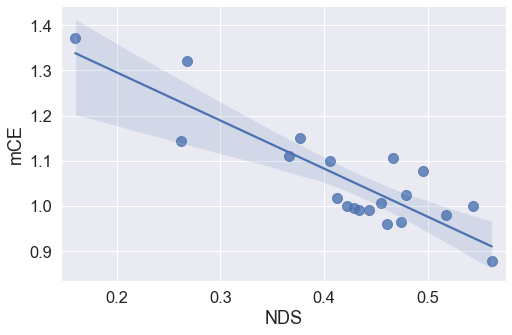

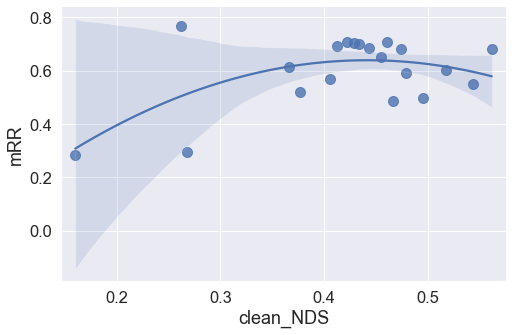

In [156]:
models = ['DETR3D', 'DETR3D_cbgs', 'BEVFormer_Base', 'BEVFormer_Base_SingleFrame', 'BEVFormer_Small', 'BEVFormer_Small_SingleFrame', 
          'PETR_r50', 'PETR_Vov', 'BEVDet_r50', 'BEVDepth_r50', 'BEVerse_Tiny', 'BEVerse_Tiny_SingleFrame', 'BEVerse_Small', 'BEVerse_Small_SingleFrame', 
          'ORA3D', 'PolarFormer_r101', 'SRCN3D_res', 'Sparse4D', 'PolarFormer_Vov', 'SRCN3D_Vov'] # 'PolarFormer_Vov', 'SRCN3D_Vov'

# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = None

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, 
                            set_range=True, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=95, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, 
                            set_range=True, order=2, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=85, scatter_kws={'s':100}, fit_reg=True)

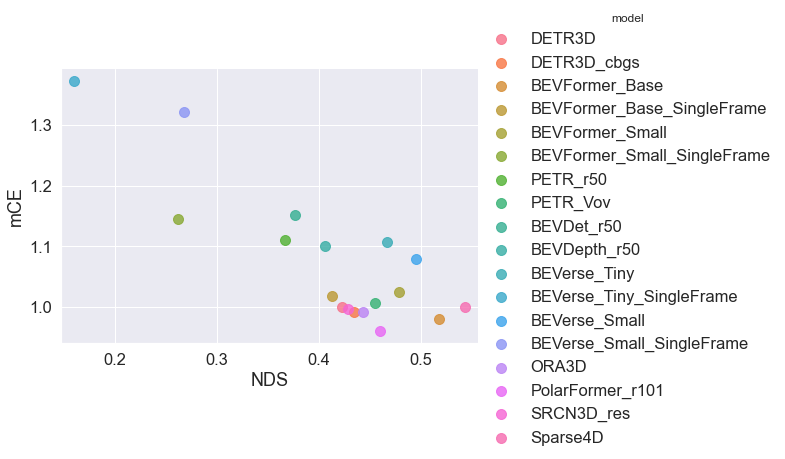

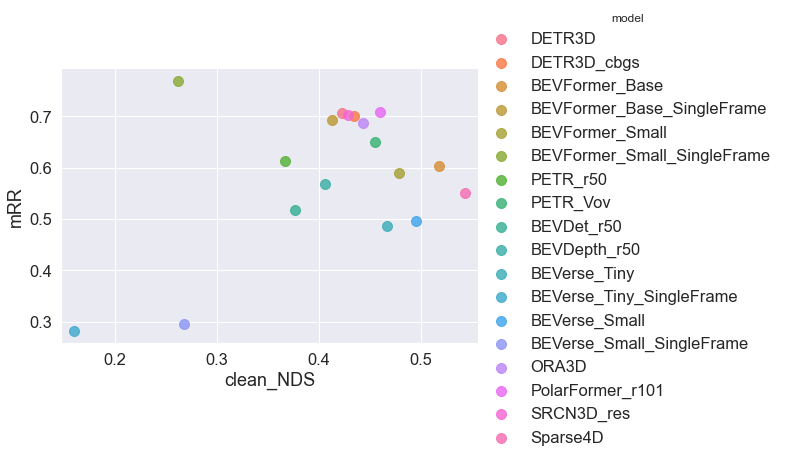

In [177]:
hue = 'model'

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, 
                            set_range=True, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=95, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, 
                            set_range=True, order=2, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=85, scatter_kws={'s':100}, fit_reg=True)

##### Depth Estimation
Depth-estimation-free approaches show better robustness under both mCE and mRR

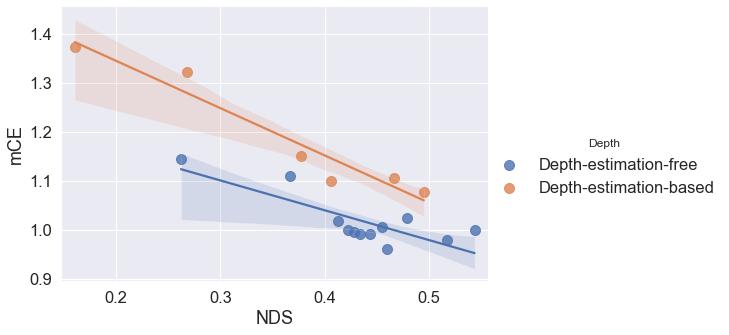

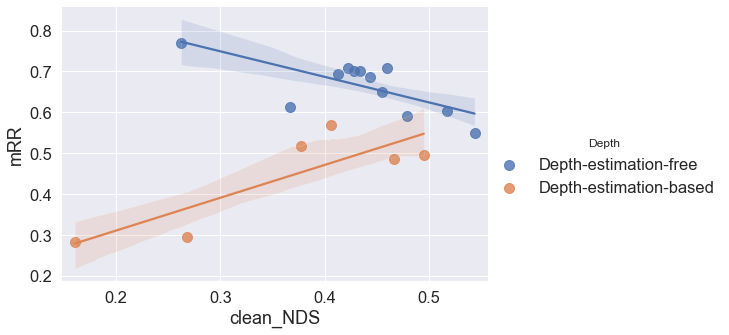

In [161]:
models = ['DETR3D', 'DETR3D_cbgs', 'BEVFormer_Base', 'BEVFormer_Base_SingleFrame', 'BEVFormer_Small', 'BEVFormer_Small_SingleFrame', 
          'PETR_r50', 'PETR_Vov', 'BEVDet_r50', 'BEVDepth_r50', 'BEVerse_Tiny', 'BEVerse_Tiny_SingleFrame', 'BEVerse_Small', 'BEVerse_Small_SingleFrame', 
          'ORA3D', 'PolarFormer_r101', 'SRCN3D_res', 'Sparse4D'] # 'PolarFormer_Vov', 'SRCN3D_Vov'

# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Depth'

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, 
                            set_range=True, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=85, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, 
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=80, scatter_kws={'s':100}, fit_reg=True)

##### Pretrain
Models pretrain on FCOS3D show obvious advantages over randomly initialized model.

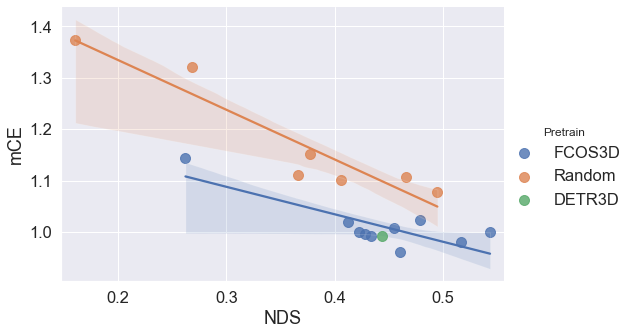

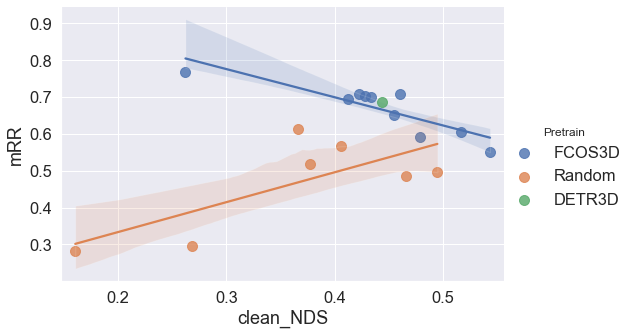

In [162]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Pretrain'

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, 
                            set_range=True, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=85, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, 
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=80, scatter_kws={'s':100}, fit_reg=True)

##### Backbone
TBD since the PolarFormer-Vov and SRCN-Vov need re-train. SwinTransformer backbone only test on `BEVerse`, which might cause unfair comparison. Add BEVDet-Swin latter.

##### BEV Encoder
Transformer-based BEV encoder shows better results than CNN-based (except for SRCN3D Res101)

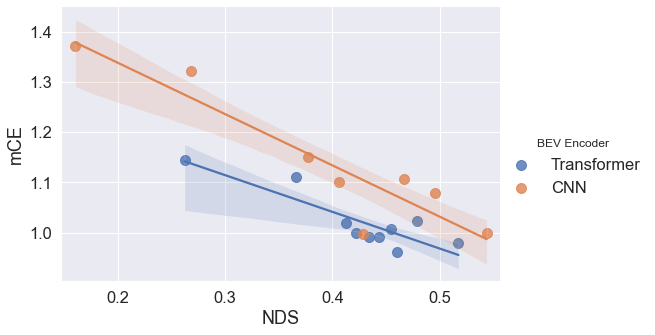

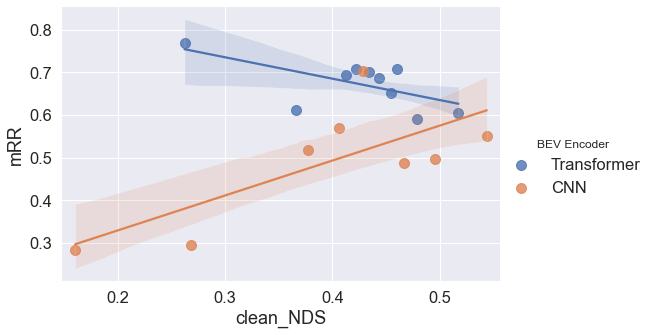

In [163]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'BEV Encoder'

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, 
                            set_range=True, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=85, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, 
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=80, scatter_kws={'s':100}, fit_reg=True)

##### Temporal

Temporal information improve clean performance while help little in terms of OOD robustness. Which means the corrupted history information can no longer contribute to predict current frame.

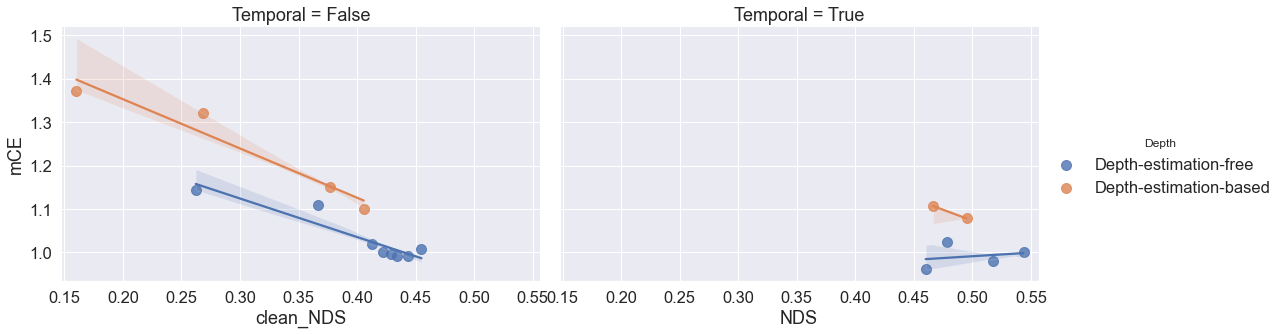

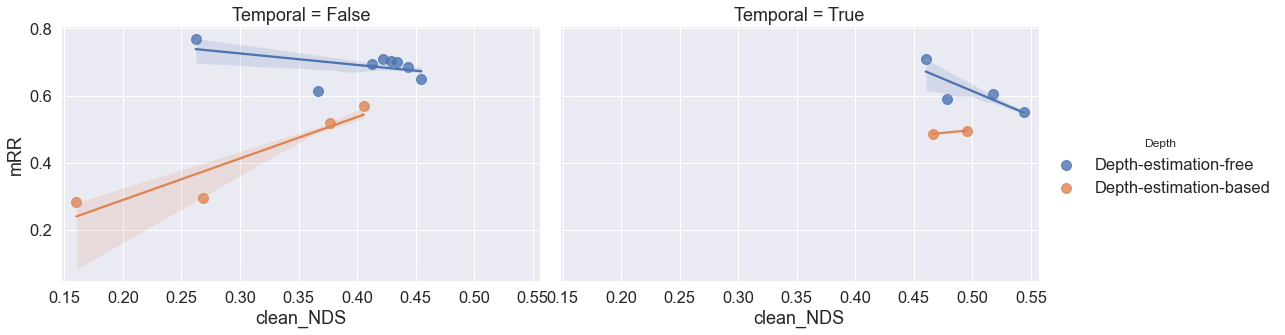

In [175]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Depth'
col = 'Temporal'

data = parse_data_dataframe(models)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mCE',xlabel='NDS', hue=hue, col=col, 
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=50, scatter_kws={'s':100})
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='mRR', hue=hue, col=col, 
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, legend=True, legend_out=True, aspect=1.5, ci=50, scatter_kws={'s':100}, fit_reg=True)

#### Robustness (NDS) on Different Corruption Types
##### Camera Crash

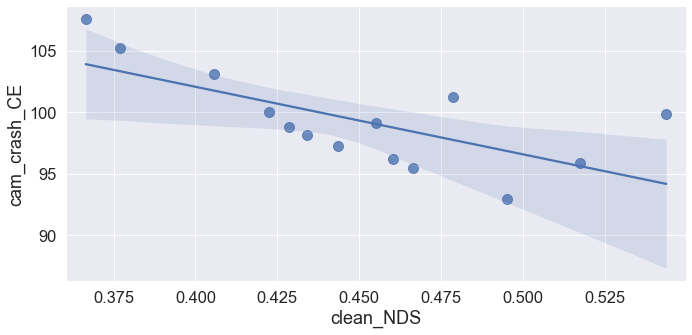

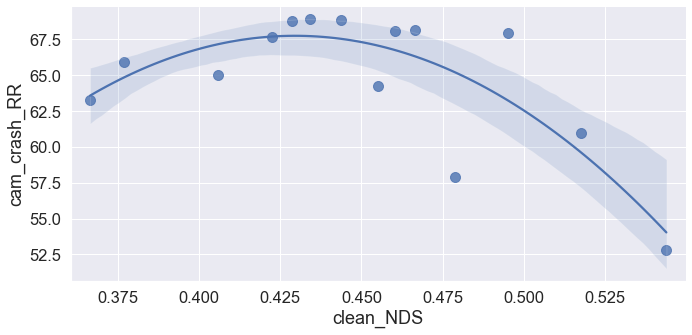

In [119]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='cam_crash_CE', set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='cam_crash_RR', set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

We mainly focus on analysis the temporal modeling. Surprisingly, when utilize temporal information, the robustness under camera crash drop. These might due to all the temporal model are trained on clean dataset, the all black images provide by crashed camera will poison the temporal feature.

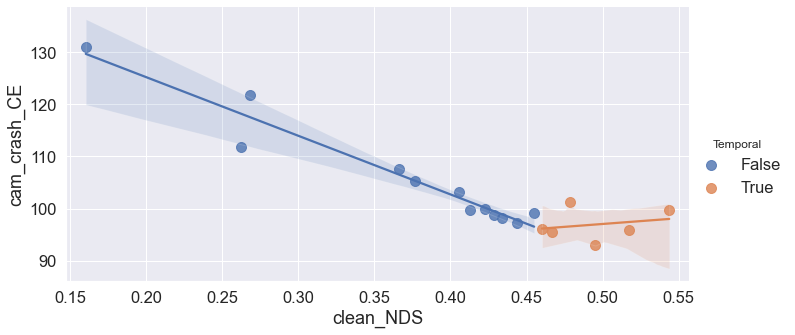

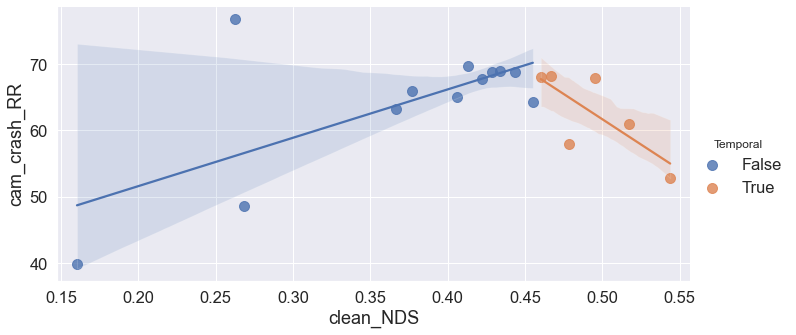

In [179]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='cam_crash_CE', hue=hue,
                            set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='cam_crash_RR', hue=hue,
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

#### Frame Lost

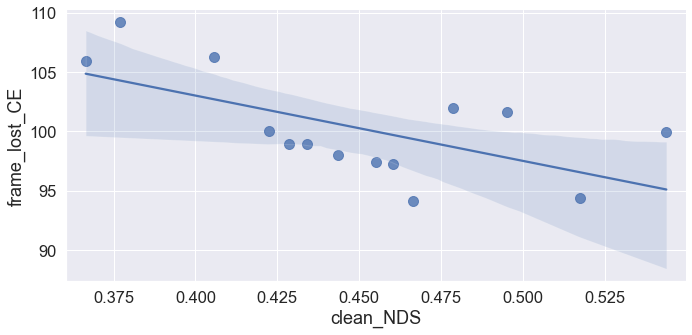

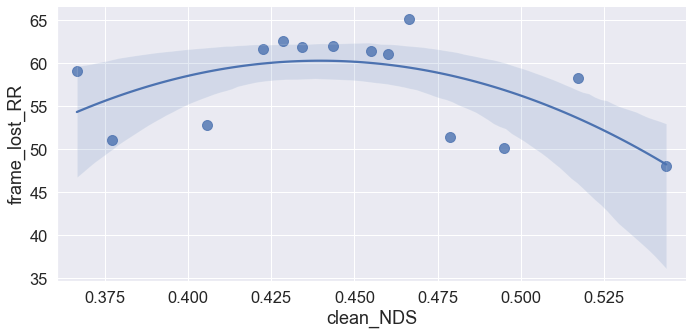

In [120]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='frame_lost_CE', 
                            set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='frame_lost_RR', 
                            set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

These show similar trend to Camera Crash.

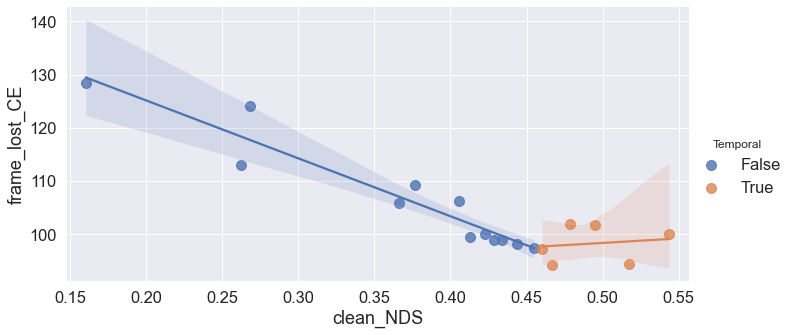

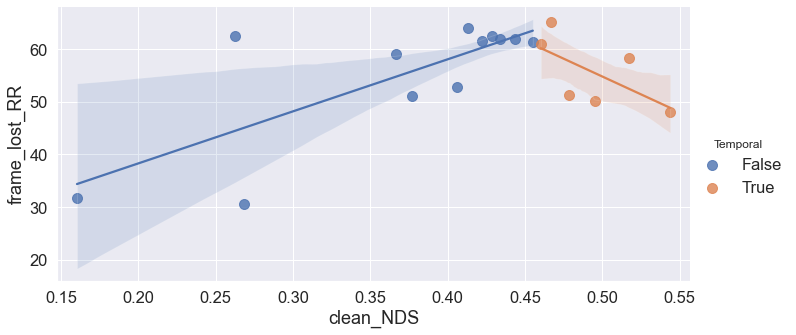

In [181]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='frame_lost_CE', hue=hue,
                            set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='frame_lost_RR', hue=hue,
                            set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

#### Color Quant

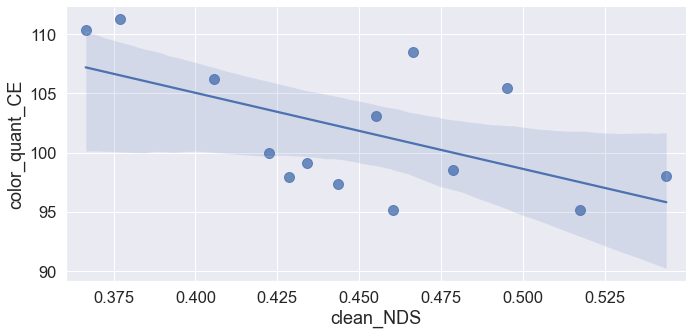

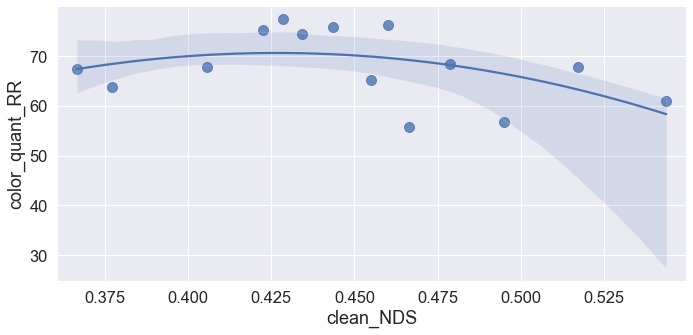

In [121]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='color_quant_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='color_quant_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

We mainly study the influence of model architecture here. Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`). The results of CE and RR of `Quant` are almost the same to the mCE and mRR.

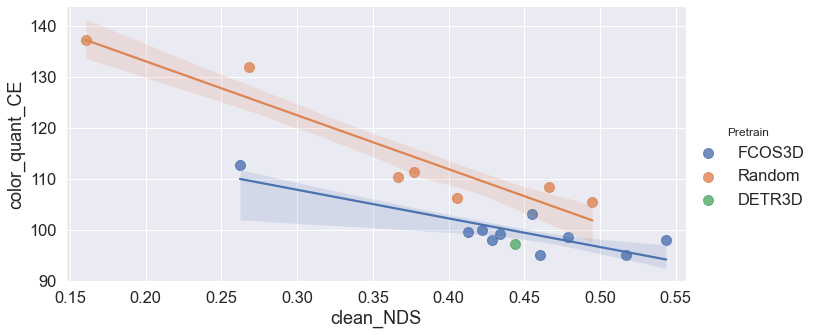

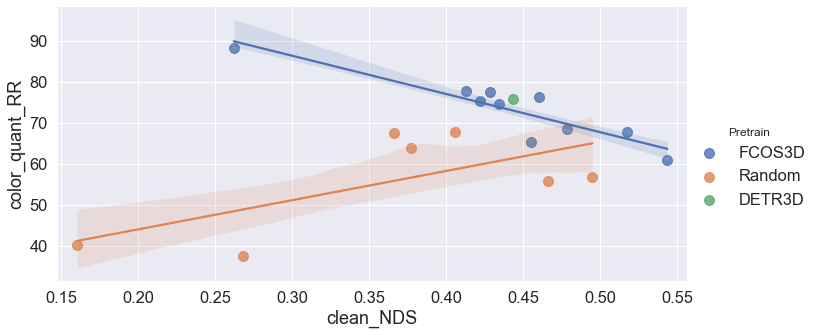

In [191]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Pretrain'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='color_quant_CE', hue=hue,
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=75, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='color_quant_RR', hue=hue, 
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=75, scatter_kws={'s':100}, fit_reg=True)

#### Motion Blur

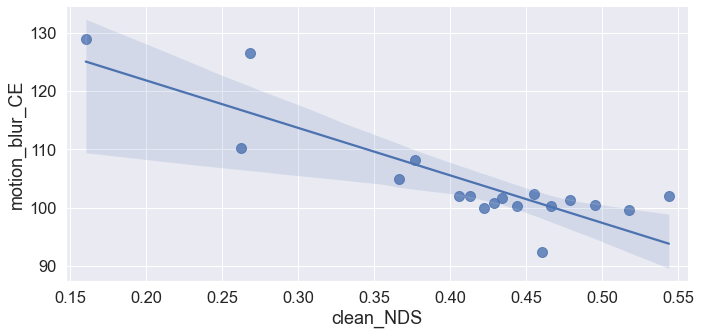

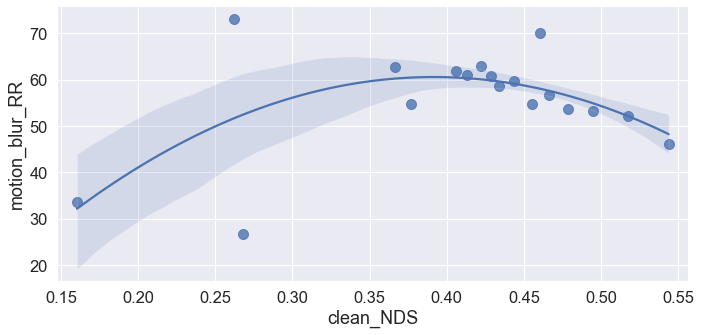

In [193]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='motion_blur_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='motion_blur_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

We mainly study the influence of model architecture here. Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`, `Temporal`).
- BEV Encoder: Transformer and CNN show similar trend.
- Depth Estimation: Depth-based and depth-free show similar trend (if we omit some BEVerse model which show very poor performance).
- Pretrain: FCOS3D pretrain do not improve OOD robustness on this corruption (if we omit some BEVerse model which show very poor performance).
- Temporal: helps little, even cause worse robustness. (Especially the mRR metric).

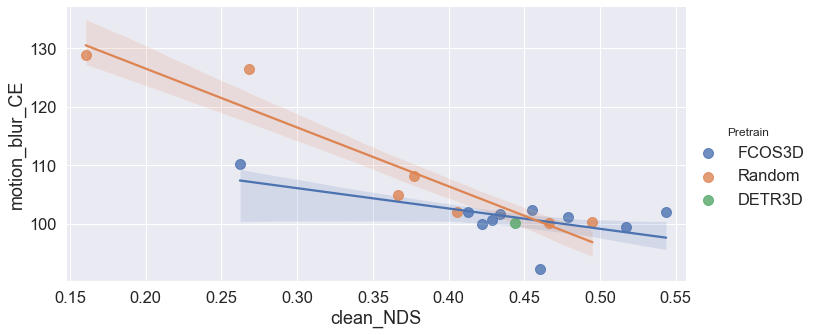

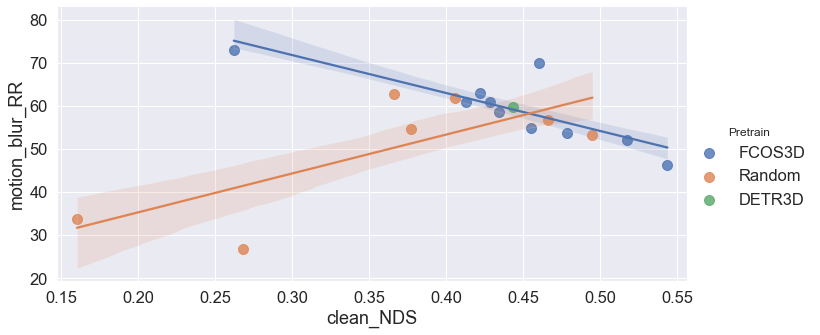

In [210]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Pretrain'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='motion_blur_CE', hue=hue,
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='motion_blur_RR',  hue=hue,
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

#### Brightness

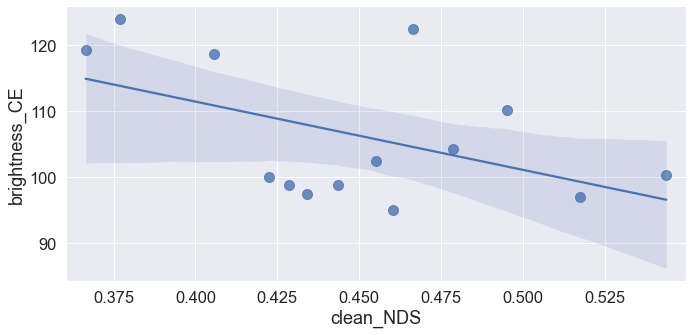

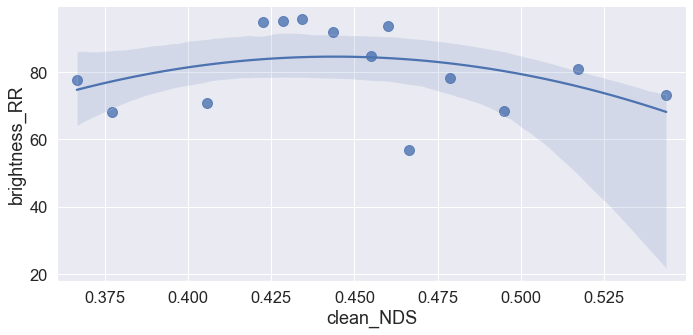

In [123]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='brightness_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=95, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='brightness_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=85, scatter_kws={'s':100}, fit_reg=True)

Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`, `Temporal`).
- Pretain: FCOS3D pretrain improve robustness.
- BEV Encoder: Transformer are better.
- Depth Estimation: Depth-free are better.
- Temporal: helps little.

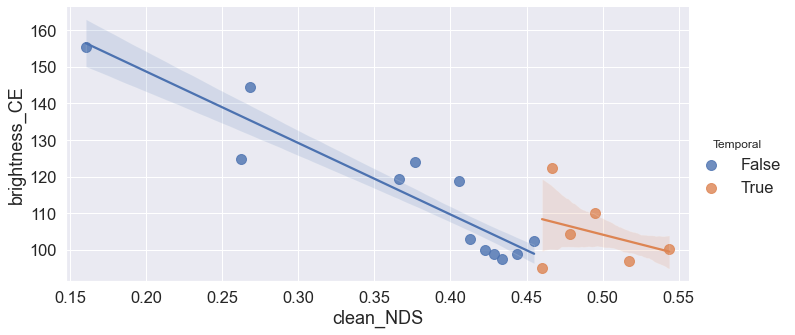

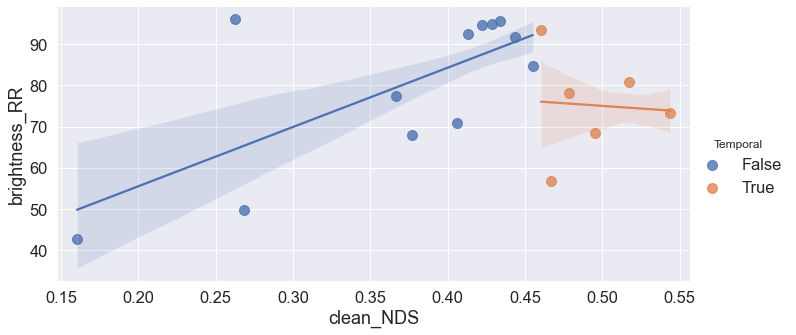

In [212]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='brightness_CE', hue=hue,
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='brightness_RR', hue=hue,
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

#### Low Light

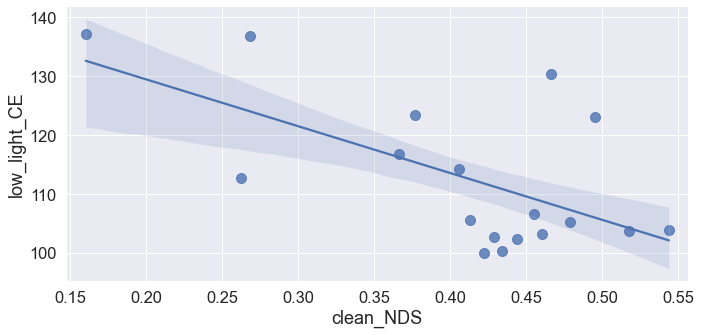

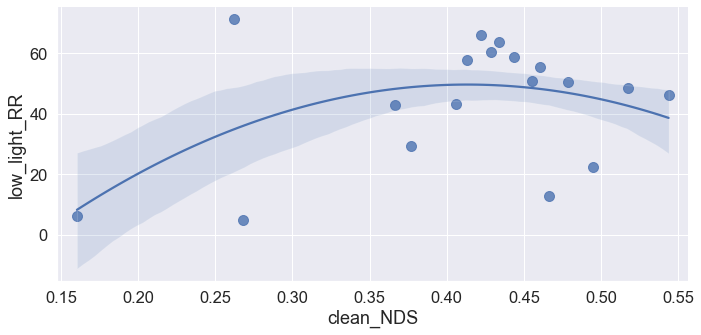

In [213]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='low_light_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=80, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='low_light_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`, `Temporal`).
- Pretain: FCOS3D pretrain improve robustness **largely**.
- BEV Encoder: Transformer are better.
- Depth Estimation: Depth-free are better.
- Temporal: helps little.

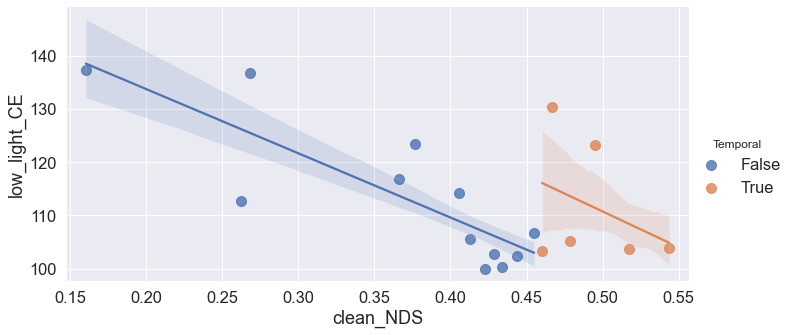

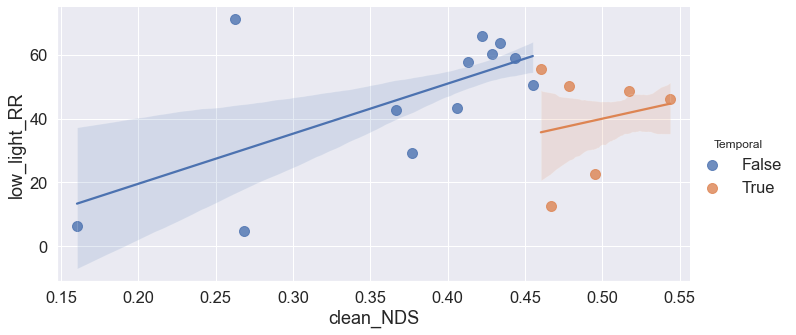

In [218]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='low_light_CE', hue=hue,
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='low_light_RR', hue=hue,
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

#### Fog

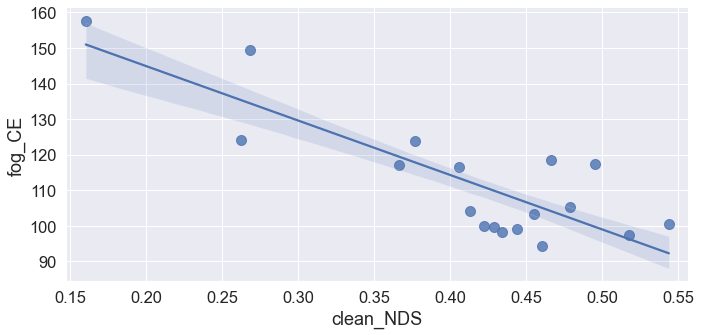

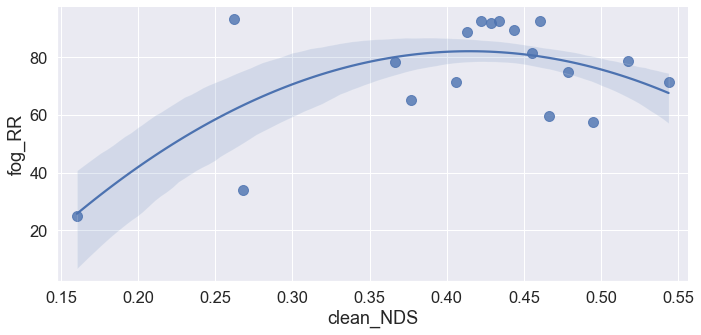

In [219]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='fog_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='fog_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`, `Temporal`).
- Pretain: FCOS3D pretrain improve robustness.
- BEV Encoder: Transformer are better.
- Depth Estimation: Depth-free are better.
- Temporal: helps little.

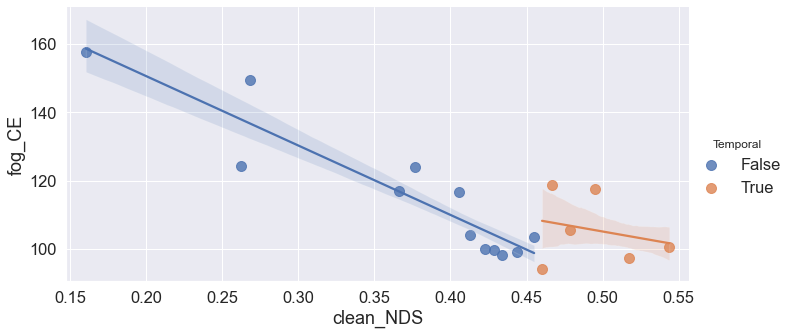

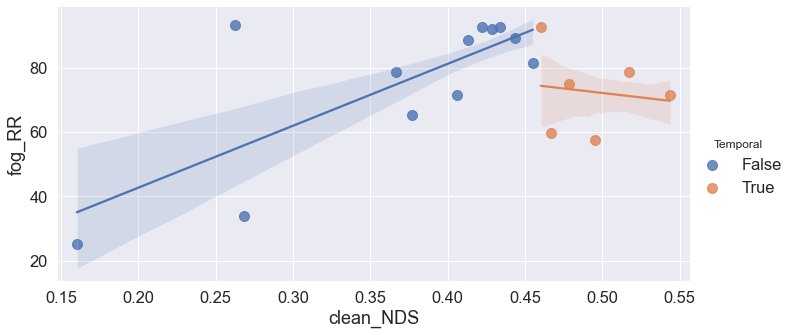

In [224]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='fog_CE', hue=hue,
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='fog_RR', hue=hue,
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

#### Snow
The CE and RR vary largely compared to previous corruptions.

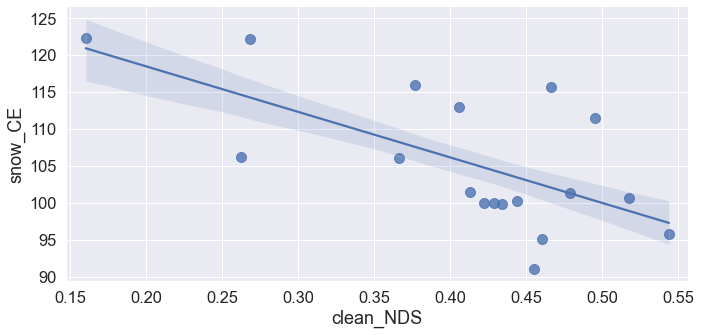

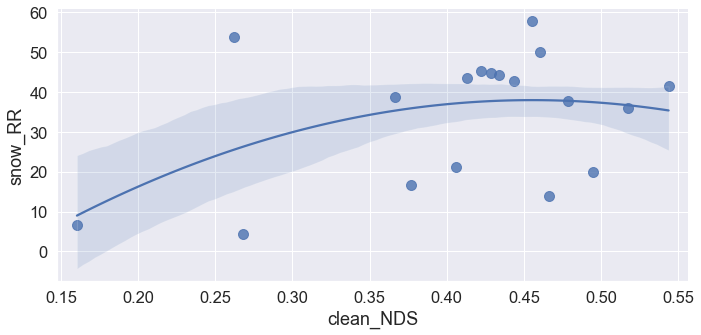

In [225]:
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='snow_CE', 
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='snow_RR', 
                        set_range=True, order=2, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)

Please change the `hue` to see the results (e.g. `BEV Encoder`, `Depth`, `Pretrain`, `Temporal`).
- Pretain: FCOS3D pretrain improve robustness.
- BEV Encoder: Transformer are better. (except SRCN3D and Sparse4D, both utilize Sparse CNN)
- Depth Estimation: Depth-free are better.
- Temporal: helps little.

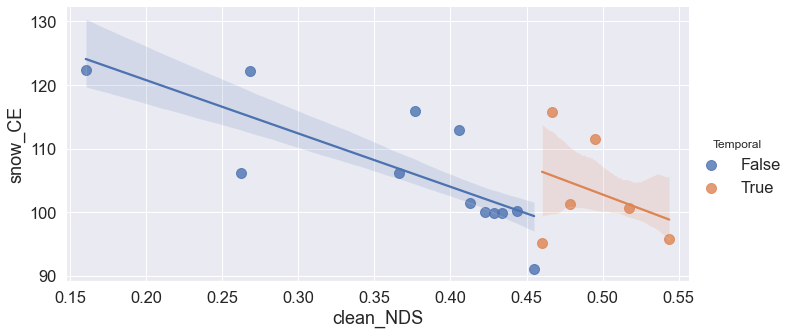

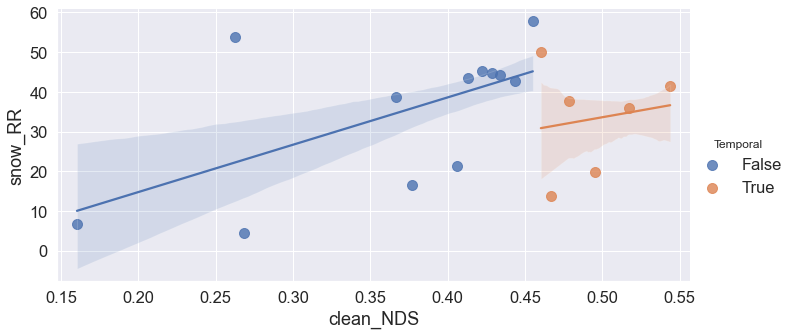

In [230]:
# FACTORS = ['Pretrain', 'BEV Encoder', 'Depth', 'Backbone', 'Extra Data', 'Temporal', 'CBGS']

hue = 'Temporal'

plot_scatter_seaborn_api(data=data, x='clean_NDS', y='snow_CE', hue=hue,
                        set_range=True, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)
plot_scatter_seaborn_api(data=data, x='clean_NDS', y='snow_RR', hue=hue, 
                        set_range=True, order=1, font_scale=1.5, rotate_x=None, aspect=2, ci=70, scatter_kws={'s':100}, fit_reg=True)